# unittest

In this notebook, you can show your model and components works well with real samples from dataset(CIFAR, ImageNet) and visualize your logic!

In [1]:
import pickle

import torch
from ignite.utils import manual_seed

from analyze import *
from train import load_model

manual_seed(123)

sample batch


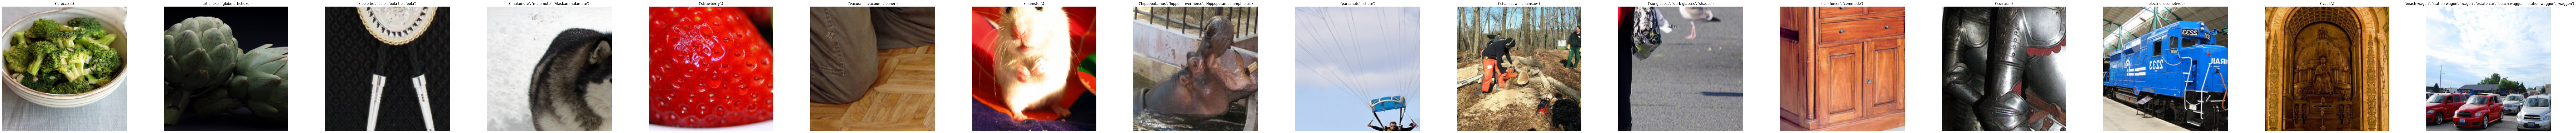

In [2]:
with open('materials/samples/sample_ImageNet', 'rb') as f:
    sample = pickle.load(f)

print(f'sample batch')
visualize_images(sample['batch']['images'],
                 sample['batch']['tags'],
                 sample['batch']['used_normalization'],
                 sample['batch']['classes'])

## Baseline

In [3]:
def test_model_Baseline():
    with open('Q/sample_config_Baseline.json', 'r') as config_file:
        config = json.load(config_file)

    model = load_model(config)
    
    print(f'baseline model architecture: ')
    print(model)
    
    y = model(sample['batch']['images'])
    
    
test_model_Baseline()

baseline model architecture: 
ResNet_Baseline(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (layer1): Sequential(
    (0): BasicBlock_Baseline(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): BasicBlock_Baseline(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3

## Quantization_Aware_Training (QAT)

In [4]:
def test_model_QAT():
    with open('Q/sample_config_QAT.json', 'r') as config_file:
        config = json.load(config_file)

    model = load_model(config)
    
    print(f'QAT model architecture: ')
    print(model)
    
    y = model(sample['batch']['images'])  
    
    
test_model_QAT()

QAT model architecture: 
ResNet_Baseline(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (layer1): Sequential(
    (0): BasicBlock_QAT(
      (conv1): QuantConv2d(
        64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
        (input_quant): ActQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
        )
        (output_quant): ActQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
        )
        (weight_quant): WeightQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
          (tensor_quant): RescalingIntQuant(
            (int_quant): IntQuant(
              (float_to_int_impl): RoundSte()
              (tensor_clamp_impl): TensorClampSte()
              (delay

## Squeeze_and_Excitation (SE)

In [6]:
def test_model_SE():
    with open('Q/sample_config_SE.json', 'r') as config_file:
        config = json.load(config_file)

    model = load_model(config)
    
    print(f'SE model architecture: ')
    print(model)
    
    y = model(sample['batch']['images'])
    
    
test_model_SE()

SE model architecture: 
ResNet_Baseline(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (layer1): Sequential(
    (0): BasicBlock_SE(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
      (se): SELayer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=False)
          (1): ReLU(inplace=True)
          (2